<a href="https://colab.research.google.com/github/ssttv/ml-resources/blob/master/fastai_dl1_dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip3 install fastai==0.7.0

In [0]:
!pip3 install torchtext==0.2.3

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [0]:
!wget http://files.fast.ai/data/dogscats.zip
!unzip dogscats.zip
!mkdir data
!mv dogscats data

In [0]:
PATH = "data/dogscats/"
sz=224

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(resnet34, sz))

In [9]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)
learn.fit(0.01, 3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 95010725.14it/s]


100%|██████████| 32/32 [00:15<00:00,  2.03it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.045696   0.028215   0.9895    
    1      0.037623   0.024828   0.991     
    2      0.040837   0.028099   0.9895    



[array([0.0281]), 0.9895]

In [10]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
data.classes

['cats', 'dogs']

In [0]:
log_preds = learn.predict()

In [13]:
log_preds[:10]

array([[ -0.00035,  -7.95843],
       [ -0.00001, -11.1152 ],
       [ -0.07247,  -2.66066],
       [ -0.0234 ,  -3.76663],
       [ -0.00007,  -9.61051],
       [ -0.00008,  -9.43621],
       [ -0.00007,  -9.58021],
       [ -0.00008,  -9.40788],
       [ -0.004  ,  -5.52383],
       [ -0.     , -12.22444]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1]) 

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


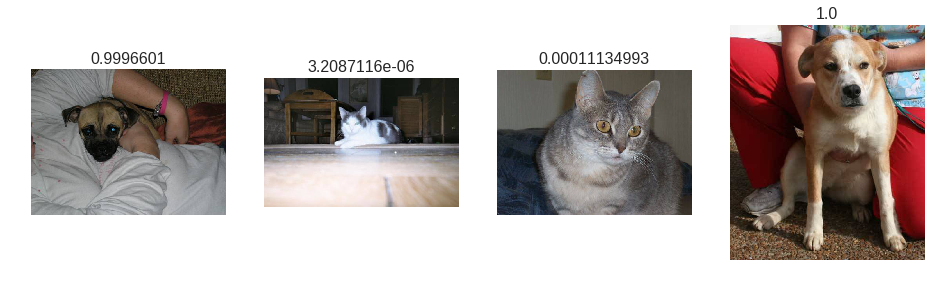

In [20]:
# 1. A few correct labels at random 
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


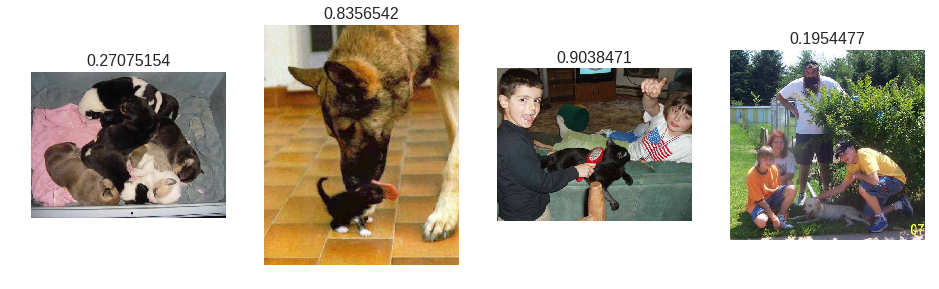

In [21]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")